In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm


import pandahouse

In [2]:
# —É—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º connection —Å –ë–î
connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'simulator_20221120',
                      'user':'USER', 
                      'password':'PASSWORD'
                     }

q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2022-10-26' and '2022-11-01'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df_aa = pandahouse.read_clickhouse(q, connection=connection)

df_aa.head()

exp_group  user_id  likes  views       ctr
0          3   115383     11     36  0.305556
1          3   123580     15     92  0.163043
2          2   131473     26    148  0.175676
3          2    23985     12     66  0.181818
4          2    24523     17    120  0.141667

# 1 –ó–∞–¥–∞–Ω–∏–µ

## –ê/–ê —Ç–µ—Å—Ç
–ß—Ç–æ –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å: —É –Ω–∞—Å –µ—Å—Ç—å –¥–∞–Ω–Ω—ã–µ –ê–ê-—Ç–µ—Å—Ç–∞ —Å '2022-10-26' –ø–æ '2022-11-01'. –í–∞–º –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–∏–º—É–ª—è—Ü–∏—é, –∫–∞–∫ –±—É–¥—Ç–æ –º—ã –ø—Ä–æ–≤–µ–ª–∏ 10000 –ê–ê-—Ç–µ—Å—Ç–æ–≤. –ù–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –≤–∞–º –Ω—É–∂–Ω–æ —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏ –±–µ–∑ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏—è –≤ 500 —é–∑–µ—Ä–æ–≤ –∏–∑ 2 –∏ 3 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω–æ–π –≥—Ä—É–ø–ø—ã. –ü—Ä–æ–≤–µ—Å—Ç–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —ç—Ç–∏—Ö –ø–æ–¥–≤—ã–±–æ—Ä–æ–∫ t-test–æ–º.

1. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–ª—É—á–∏–≤—à–∏—Ö—Å—è 10000 p-values.

2. –ü–æ—Å—á–∏—Ç–∞—Ç—å, –∫–∞–∫–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç p values –æ–∫–∞–∑–∞–ª—Å—è –º–µ–Ω—å—à–µ –ª–∏–±–æ —Ä–∞–≤–µ–Ω 0.05

3. –ù–∞–ø–∏—Å–∞—Ç—å –≤—ã–≤–æ–¥ –ø–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º—É –ê–ê-—Ç–µ—Å—Ç—É, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –ª–∏ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞—à–∞ —Å–∏—Å—Ç–µ–º–∞ —Å–ø–ª–∏—Ç–æ–≤–∞–Ω–∏—è.

4. –ü—Ä–∏—à–ª–∏—Ç–µ —Å—Å—ã–ª–∫—É –Ω–∞ merge request c –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω—ã–º –∞–Ω–∞–ª–∏–∑–æ–º.

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [01:18<00:00, 127.09it/s]


0.0437

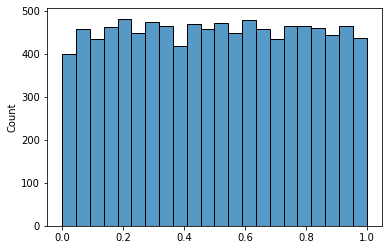

In [3]:
simulations = 10000
n_s = 500
res = []

# A/A —Ç–µ—Å—Ç
for i in tqdm(range(simulations)):
    s1 = df_aa.query('exp_group == 2')['ctr'].sample(n_s, replace = False).values
    s2 = df_aa.query('exp_group == 3')['ctr'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # —Å–æ—Ö—Ä–∞–Ω—è–µ–º pvalue

sns.histplot(res)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–æ–∂–Ω–æ–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Å–ª—É—á–∞–µ–≤ –Ω–µ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –∞–ª—å—Ñ–∞
sum(np.array(res) <0.05) / simulations

**–í—ã–≤–æ–¥**

—Å–∏—Å—Ç–µ–º–∞ —Å–ø–ª–∏—Ç–æ–≤–∞–Ω–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–∏ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 0,05

# 2 –ó–∞–¥–∞–Ω–∏–µ
–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç –ø—Ä–æ—Ö–æ–¥–∏–ª —Å 2022-11-02 –ø–æ 2022-11-08 –≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ. –î–ª—è —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –±—ã–ª–∏ –∑–∞–¥–µ–π—Å—Ç–≤–æ–≤–∞–Ω—ã 2 –∏ 1 –≥—Ä—É–ø–ø—ã. 
–í –≥—Ä—É–ø–ø–µ 2 –±—ã–ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –æ–¥–∏–Ω –∏–∑ –Ω–æ–≤—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ—Å—Ç–æ–≤, –≥—Ä—É–ø–ø–∞ 1 –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞—Å—å –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∫–æ–Ω—Ç—Ä–æ–ª—è. 

–û—Å–Ω–æ–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –Ω–æ–≤—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –≤–æ 2-–π –≥—Ä—É–ø–ø–µ –ø—Ä–∏–≤–µ–¥–µ—Ç –∫ —É–≤–µ–ª–∏—á–µ–Ω–∏—é CTR. 

**–í–∞—à–∞ –∑–∞–¥–∞—á–∞** ‚Äî –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –êB-—Ç–µ—Å—Ç–∞. 

1. –í—ã–±—Ä–∞—Ç—å –º–µ—Ç–æ–¥ –∞–Ω–∞–ª–∏–∑–∞ –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å CTR –≤ –¥–≤—É—Ö –≥—Ä—É–ø–ø–∞—Ö (–º—ã —Ä–∞–∑–±–∏—Ä–∞–ª–∏ t-—Ç–µ—Å—Ç, –ü—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–∏–π –±—É—Ç—Å—Ç—Ä–µ–ø, —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏, t-—Ç–µ—Å—Ç –Ω–∞ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–º ctr (Œ±=5) –∞ —Ç–∞–∫–∂–µ t-—Ç–µ—Å—Ç –∏ —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –ø–æ–≤–µ—Ä—Ö –±–∞–∫–µ—Ç–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è).
2. –°—Ä–∞–≤–Ω–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ —ç—Ç–∏–º–∏ —Ç–µ—Å—Ç–∞–º–∏. –ê –µ—â–µ –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≥–ª–∞–∑–∞–º–∏. –ü–æ—á–µ–º—É —Ç–µ—Å—Ç—ã —Å—Ä–∞–±–æ—Ç–∞–ª–∏ —Ç–∞–∫ –∫–∞–∫ —Å—Ä–∞–±–æ—Ç–∞–ª–∏? 
3. –û–ø–∏—à–∏—Ç–µ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—É—é —Å–∏—Ç—É–∞—Ü–∏—é, –∫–æ–≥–¥–∞ —Ç–∞–∫–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –º–æ–≥–ª–æ –ø—Ä–æ–∏–∑–æ–π—Ç–∏. –¢—É—Ç –Ω–µ—Ç –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –æ—Ç–≤–µ—Ç–∞, –ø–æ–¥—É–º–∞–π—Ç–µ.
4. –ù–∞–ø–∏—à–∏—Ç–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—é, –±—É–¥–µ–º –ª–∏ –º—ã —Ä–∞—Å–∫–∞—Ç—ã–≤–∞—Ç—å –Ω–æ–≤—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –Ω–∞ –≤—Å–µ—Ö –Ω–æ–≤—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–ª–∏ –≤—Å–µ-—Ç–∞–∫–∏ –Ω–µ —Å—Ç–æ–∏—Ç.

In [4]:
connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'simulator_20221120',
                      'user':'USER', 
                      'password':'PASSWORD'
                     }

q_ab = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2022-11-02' and '2022-11-08'
    and exp_group in (2,1)
GROUP BY exp_group, user_id
"""

df_ab = pandahouse.read_clickhouse(q_ab, connection=connection)

df_ab.head()

exp_group  user_id  likes  views       ctr
0          1   109963      3     15  0.200000
1          1    26117     32    141  0.226950
2          1   138232     18     73  0.246575
3          1    26295     33    122  0.270492
4          1    18392      7     32  0.218750

# –ê/B —Ç–µ—Å—Ç

## t-—Ç–µ—Å—Ç –Ω–∞ CTR

–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ H0: Œº1 = Œº2 

–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ H1: Œº1 != Œº

In [5]:
control = df_ab.query('exp_group == 1')['ctr'].values
test = df_ab.query('exp_group == 2')['ctr'].values
stats.ttest_ind(s1, s2, equal_var = False)

Ttest_indResult(statistic=0.07254532035609622, pvalue=0.9421824759000128)

In [6]:
df_ab.query('exp_group == [1,2]').groupby('exp_group').agg({'ctr':'mean'})

ctr
exp_group          
1          0.215605
2          0.214419

<AxesSubplot:xlabel='ctr', ylabel='Count'>

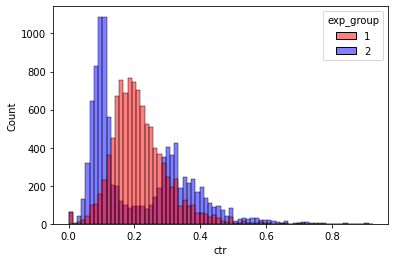

In [7]:
sns.histplot(data=df_ab, 
             x ='ctr', 
             hue='exp_group',
            palette = ['r', 'b'])

**–í—ã–≤–æ–¥**

—Å–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º—É —Ç–µ—Å—Ç—É p value > 0.05, –ø–æ—ç—Ç–æ–º—É –Ω–∞ –¥–∞–Ω–Ω–æ–º —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –º—ã –Ω–µ –º–æ–∂–µ–º –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É

## mannwhitneyu-—Ç–µ—Å—Ç –Ω–∞ CTR

–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ H0: P(X > Y) = P(Y > X)  

–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ H1: P(X > Y) != P(Y > X)

In [8]:
stats.mannwhitneyu(control, test)

MannwhitneyuResult(statistic=56601260.5, pvalue=6.0376484617779035e-56)

**–í—ã–≤–æ–¥**

—Å–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º—É —Ç–µ—Å—Ç—É p value < 0.05, –ø–æ—ç—Ç–æ–º—É –Ω–∞ –¥–∞–Ω–Ω–æ–º —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –º—ã –º–æ–∂–µ–º –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É, —á—Ç–æ –≤–∏–¥–Ω–æ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è 2-—Ö –≤—ã–±–æ—Ä–æ–∫, –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: –ø–æ—è–≤–∏–ª–∏—Å—å 2 –≤–µ—Ä—à–∏–Ω—ã -  –ø—Ä–µ–≤–∞–ª–∏—Ä—É—é—â–µ–µ –∫–æ–ª-–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å ctr –ø—Ä–∏–º–µ—Ä–Ω–æ 0.1, –∞ —Ç–∞–∫–∂–µ —É–≤–µ–ª–∏—á–∏–ª–æ—Å—å –∫–æ–ª-–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–µ–π —Å ctr 0,3 –∏ –±–æ–ª–µ–µ. –ö—Ä–æ–º–µ —Ç–æ–≥–æ –ø–æ—è–≤–∏–ª–∏—Å—å –ª–∏–¥–µ—Ä—ã –ø–æ –ª–∞–π–∫–∞–º —Å ctr –±–æ–ª–µ–µ 0.6

## bootstrap –Ω–∞ CTR

H0: –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö –Ω–µ—Ç

H1: –µ—Å—Ç—å –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö

In [9]:
# –û–±—ä—è–≤–∏–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–∑–≤–æ–ª–∏—Ç –ø—Ä–æ–≤–µ—Ä—è—Ç—å –≥–∏–ø–æ—Ç–µ–∑—ã —Å –ø–æ–º–æ—â—å—é –±—É—Ç—Å—Ç—Ä–∞–ø–∞
def get_bootstrap(
    data_column_1, # —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–µ—Ä–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
    data_column_2, # —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤—Ç–æ—Ä–æ–π –≤—ã–±–æ—Ä–∫–∏
    boot_it = 1000, # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±—É—Ç—Å—Ç—Ä—ç–ø-–ø–æ–¥–≤—ã–±–æ—Ä–æ–∫
    statistic = np.mean, # –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–∞—è –Ω–∞—Å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
    bootstrap_conf_level = 0.95 # —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
):
    
    """
    —Ñ—É–Ω–∫—Ü–∏—è –ø—Ä–æ–≤–µ—Ä—è–µ—Ç –≥–∏–ø–æ—Ç–µ–∑—ã —Å –ø–æ–º–æ—â—å—é –±—É—Ç—Å—Ç—Ä–∞–ø–∞ –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
            - –±—É—Ç—Å—Ç—Ä–∞–ø–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ,
            - –ª–µ–≤—ã–π –∏ –ø—Ä–∞–≤—ã–π –∫–≤–∞–Ω—Ç–∏–ª–∏,
            - –∑–Ω–∞—á–µ–Ω–∏–µ p-value
    """
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # –∏–∑–≤–ª–µ–∫–∞–µ–º –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # –ø–∞—Ä–∞–º–µ—Ç—Ä –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏—è
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - –ø—Ä–∏–º–µ–Ω—è–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = stats.norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = stats.norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=60,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:01<00:00, 605.17it/s]


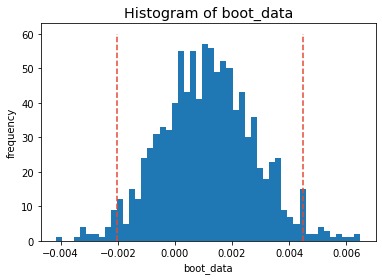

In [10]:
booted_data = get_bootstrap(df_ab.query('exp_group == 1')['ctr'], df_ab.query('exp_group == 2')['ctr']) # –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ö—Ä–∞–Ω–∏—Ç—Å—è —Ä–∞–∑–Ω–∏—Ü–∞ –¥–≤—É—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π, –î–ò –∏ pvalue

In [11]:
booted_data["p_value"]

0.47931132636066864

In [12]:
booted_data["ci"]

0
0.025 -0.002014
0.975  0.004478

**–í—ã–≤–æ–¥**

–°–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º—É —Ç–µ—Å—Ç—É –≤–∏–¥–∏–º, —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ p_value > 0.05 –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –∏–º–µ–µ—Ç –≥—Ä–∞–Ω–∏—Ü—ã [-0.001980; 0.004462], –≤ –∫–æ—Ç–æ—Ä—ã–π –ø–æ–ø–∞–¥–∞–µ—Ç 0. 
–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º—ã –Ω–µ –º–æ–∂–µ–º –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –Ω–∞ –∑–∞–¥–∞–Ω–Ω–æ–º —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏.

## –ü—É–∞—Å–æ–Ω–æ–≤—Å–∫–∏–π –±—É—Ç—Å—Ç—Ä–µ–ø bootstrap

In [13]:
def poisson_bootstap(likes1, views1, likes2, views2, n_bootstap=1000):

    """
    —Ñ—É–Ω–∫—Ü–∏—è –ø—Ä–æ–≤–µ—Ä—è–µ—Ç –≥–∏–ø–æ—Ç–µ–∑—ã —Å –ø–æ–º–æ—â—å—é –ü—É–∞—Å–æ–Ω–æ–≤—Å–∫–æ–≥–æ –±—É—Ç—Å—Ç—Ä–∞–ø–∞ –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–Ω–∏–µ 2-—Ö CTR
    """
    poisson_bootstaps1 = stats.poisson(1).rvs((1000, len(likes1))).astype(np.int64)
    
    poisson_bootstaps2 = stats.poisson(1).rvs((1000, len(likes2))).astype(np.int64)
    
    globalCTR1 = (poisson_bootstaps1*likes1).sum(axis=1)/(poisson_bootstaps1*views1).sum(axis=1)
    
    globalCTR2 = (poisson_bootstaps2*likes2).sum(axis=1)/(poisson_bootstaps2*views2).sum(axis=1)
    
    return globalCTR1, globalCTR2

In [14]:
likes1 = df_ab.query('exp_group == 1')['likes'].to_numpy()
likes2 = df_ab.query('exp_group == 2')['likes'].to_numpy()
views1 = df_ab.query('exp_group == 1')['views'].to_numpy()
views2 = df_ab.query('exp_group == 2')['views'].to_numpy()

In [15]:
ctr1, ctr2 = poisson_bootstap(likes1, views1, likes2, views2, n_bootstap=2000)

<AxesSubplot:ylabel='Count'>

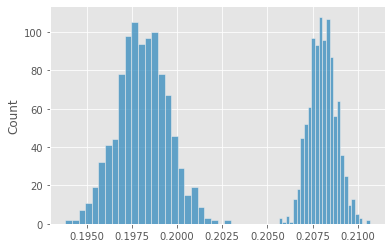

In [16]:
sns.histplot(ctr1) 
sns.histplot(ctr2) 

<AxesSubplot:ylabel='Count'>

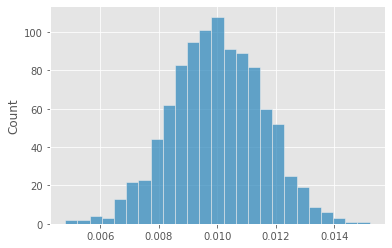

In [17]:
sns.histplot(ctr1 - ctr2) 

**–í—ã–≤–æ–¥**

–°–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º—É —Ç–µ—Å—Ç—É –≤–∏–¥–∏–º, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ 2 –≤—ã–±–æ—Ä–æ–∫ —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è –º–µ–∂–¥—É —Å–æ–±–æ–π, –∞ –∏—Ö —Ä–∞–∑–Ω–∏—Ü–∞ –±–æ–ª—å—à–µ 0, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –º—ã –º–æ–∂–µ–º –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É, –æ —Ç–æ–º, —á—Ç–æ –≤—ã–±–æ—Ä–∫–∏ –∑–Ω–∞—á–∏–º–æ –Ω–µ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è –º–µ–∂–¥—É —Å–æ–±–æ–π

## –°–≥–ª–∞–∂–µ–Ω–Ω—ã–π CTR

In [19]:
def get_smothed_ctr(user_likes, user_views, global_ctr, alpha):

    """
    —Ñ—É–Ω–∫—Ü–∏—è —Å—á–∏—Ç–∞–µ—Ç —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–π CTR –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –µ–≥–æ
    """

    smothed_ctr = (user_likes + alpha * global_ctr) / (user_views + alpha)
    return smothed_ctr

In [20]:
global_ctr_1 = df_ab[df_ab.exp_group == 1].likes.sum()/df_ab[df_ab.exp_group == 1].views.sum()
global_ctr_2 = df_ab[df_ab.exp_group == 2].likes.sum()/df_ab[df_ab.exp_group == 2].views.sum()

<AxesSubplot:xlabel='ctr', ylabel='Count'>

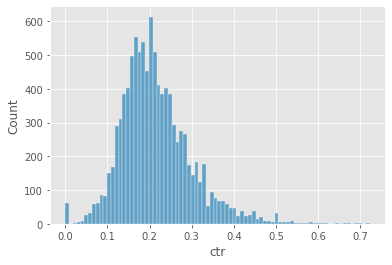

In [21]:
group1 = df_ab[df_ab.exp_group == 1].copy()
sns.histplot(group1.ctr, 
             kde = False)

<AxesSubplot:xlabel='ctr', ylabel='Count'>

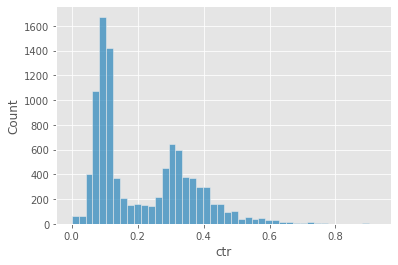

In [22]:
group2 = df_ab[df_ab.exp_group == 2].copy()
sns.histplot(group2.ctr, 
             kde = False)

<AxesSubplot:xlabel='smothed_ctr', ylabel='Count'>

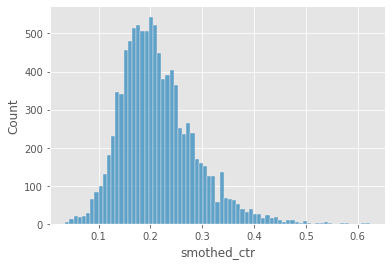

In [23]:
group1['smothed_ctr'] = df_ab.apply(
    lambda x: get_smothed_ctr(x['likes'], x['views'], global_ctr_1, 5), axis=1)

sns.histplot(group1.smothed_ctr, 
             kde = False)

<AxesSubplot:xlabel='smothed_ctr', ylabel='Count'>

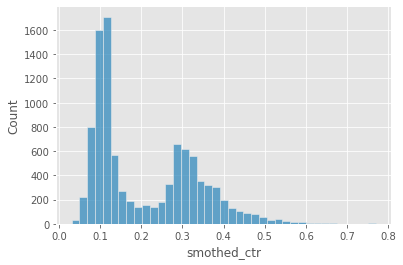

In [24]:
group2['smothed_ctr'] = df_ab.apply(
    lambda x: get_smothed_ctr(x['likes'], x['views'], global_ctr_2, 5), axis=1)

sns.histplot(group2.smothed_ctr, 
             kde = False)

In [25]:
group2['smothed_ctr'].mean()

0.21073955503259234

In [26]:
group1['smothed_ctr'].mean()

0.21402549608884142

In [27]:
stats.ttest_ind(group1['smothed_ctr'] , group2['smothed_ctr'] , equal_var = False)

Ttest_indResult(statistic=2.2841320431616983, pvalue=0.0223769815558559)

**–í—ã–≤–æ–¥**

—Å–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º—É —Ç–µ—Å—Ç—É p value < 0.05, –ø–æ—ç—Ç–æ–º—É –Ω–∞ –¥–∞–Ω–Ω–æ–º —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –º—ã –º–æ–∂–µ–º –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –∏ –ø—Ä–∏–Ω—è—Ç—å –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é

## –ë–∞–∫–µ—Ç–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ

In [28]:
q_bucket = """
SELECT exp_group, bucket,
    sum(likes)/sum(views) as bucket_ctr,
    quantileExact(0.9)(ctr) as ctr9
FROM (SELECT exp_group, 
        xxHash64(user_id)%50 as bucket,
        user_id,
        sum(action = 'like') as likes,
        sum(action = 'view') as views,
        likes/views as ctr
    FROM {db}.feed_actions 
    WHERE toDate(time) between '2022-11-02' and '2022-11-08'
        and exp_group in (2,1)
    GROUP BY exp_group, bucket, user_id)
GROUP BY exp_group, bucket
"""

df_bucket_ctr = pandahouse.read_clickhouse(q_bucket, connection=connection)

stats.mannwhitneyu(df_bucket_ctr[df_bucket_ctr.exp_group == 1].bucket_ctr, 
                   df_bucket_ctr[df_bucket_ctr.exp_group == 2].bucket_ctr, 
                   alternative = 'two-sided')

MannwhitneyuResult(statistic=1995.0, pvalue=2.859963936492646e-07)

**–í—ã–≤–æ–¥**

—Å–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º—É —Ç–µ—Å—Ç—É p value < 0.05, –ø–æ—ç—Ç–æ–º—É –Ω–∞ –¥–∞–Ω–Ω–æ–º —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –º—ã –º–æ–∂–µ–º –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –∏ –ø—Ä–∏–Ω—è—Ç—å –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–∑–ª–∏—á–∏–∏ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è—Ö –≤ –¥–≤—É—Ö –≤—ã–±–æ—Ä–∫–∞—Ö

## –í—ã–≤–æ–¥—ã
–î–ª—è –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –±—ã–ª–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –º–µ—Ç–æ–¥—ã t-—Ç–µ—Å—Ç, –æ–±—ã—á–Ω—ã–π –±—É—Ç—Å—Ç—Ä–µ–ø, –ü—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–∏–π –±—É—Ç—Å—Ç—Ä–µ–ø, —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏, t-—Ç–µ—Å—Ç –Ω–∞ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–º ctr (Œ±=5) –∏ —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –ø–æ–≤–µ—Ä—Ö –±–∞–∫–µ—Ç–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è. –ö–∞–∂–¥—ã–π –∏–∑ –º–µ—Ç–æ–¥–æ–≤ –ø–æ–∫–∞–∑–∞–ª —Å–µ–±—è –ø–æ-—Ä–∞–∑–Ω–æ–º—É.
 1. –¢-—Ç–µ—Å—Ç –Ω–∞ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ –ø—Ä–∏ –º–µ—Ç—Ä–∏–∫–µ CTR –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è - –Ω–µ –Ω–∞—à–µ–ª –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ —Å—Ä–µ–¥–Ω–∏—Ö –º–µ–∂–¥—É 2 –≤—ã–±–æ—Ä–∫–∞–º–∏. –î–∞–Ω–Ω—ã–π —Ñ–∞–∫—Ç —Å–≤—è–∑–∞–Ω —Å —Ç–µ–º, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è 2 –Ω–∞—à–∏—Ö –≤—ã–±–æ—Ä–æ–∫ —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è, –∏ –≤–æ 2 –≤—ã–±–æ—Ä–∫–µ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã (ctr –±–æ–ª–µ–µ 0,7), –∞ —Ç–∞–∫–∂–µ –ø–µ—Ä–µ–∫–æ—Å –≤ —Å—Ç–æ—Ä–æ–Ω—É ctr ~ 0.1, —á—Ç–æ —Å–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –Ω–∞ —Å—Ä–µ–¥–Ω–µ–º –∑–Ω–∞—á–µ–Ω–∏–∏, –∫–æ—Ç–æ—Ä–æ–µ –Ω–µ —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.
 2. –û–±—ã—á–Ω—ã–π –±—É—Ç—Å—Ç—Ä–µ–ø —Ç–∞–∫–∂–µ –Ω–µ –Ω–∞—à–µ–ª –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ 2 –≤—ã–±–æ—Ä–∫–∞—Ö, –æ–¥–Ω–∞–∫–æ –µ–≥–æ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç–∞—è –≤–µ—Ä—Å–∏—è –ü—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–∏–π –±—É—Ç—Å—Ç—Ä–µ–ø –Ω–∞—à–µ–ª —Ä–∞–∑–ª–∏—á–∏—è –≤ 2 –≤—ã–±–æ—Ä–∫–∞—Ö
 3. —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –ø–æ–∫–∞–∑–∞–ª –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è, —á—Ç–æ –¥–æ–≤–æ–ª—å–Ω–æ –æ—á–µ–≤–∏–¥–Ω–æ —Ç–∞–∫, –∫–∞–∫ –º—ã –≤–∏–¥–∏–º –Ω–∞–≥–ª—è–¥–Ω–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è—Ö –º–µ–∂–¥—É 2 –≤—ã–±–æ—Ä–∫–∞–º–∏: –µ—Å–ª–∏ –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –æ–Ω–æ —É–Ω–∏–º–æ–¥–∞–ª—å–Ω–æ –∏ –∏–º–µ–µ—Ç —è–≤–Ω–æ –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ –≤ —Ä–∞–π–æ–Ω–µ 0.2, —Ç–æ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –º—ã –≤–∏–¥–∏–º 2 –ø–∏–∫–∞: 1 –Ω–∞ —É—Ä–æ–≤–Ω–µ 0.1 (—á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ –ø—Ä–µ–≤–∞–ª–∏—Ä—É–µ—Ç) –∏ 2 –Ω–∞ —É—Ä–æ–≤–Ω–µ 0.3. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –≤–∏–¥–Ω–æ, —á—Ç–æ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–∑–º–µ–Ω–∏–ª–æ—Å—å. –¢–µ–ø–µ—Ä—å —É –¥–æ–≤–æ–ª—å–Ω–æ –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª-–≤–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π ctr —Å–Ω–∏–∑–∏–ª—Å—è, –æ–¥–Ω–∞–∫–æ —É 2 –ø–æ–ª–æ–≤–∏–Ω–µ –æ–Ω –ø–æ–≤—ã—Å–∏–ª—Å—è, –±–æ–ª–µ–µ —Ç–æ–≥–æ –º–æ–∂–Ω–æ –Ω–∞–±–ª—é–¥–∞—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å ctr –±–æ–ª–µ–µ 0.7
 4. t-—Ç–µ—Å—Ç –Ω–∞ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–º ctr (Œ±=5) —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑–∞–ª –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –≤—ã–±–æ—Ä–∫–∞—Ö, —á—Ç–æ –ø—Ä–æ–∏–∑–æ—à–ª–æ –±–ª–∞–≥–æ–¥–∞—Ä—è —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—é ctr –≤ –≤—ã–±–æ—Ä–∫–∞—Ö.
 5. —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –ø–æ–≤–µ—Ä—Ö –±–∞–∫–µ—Ç–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑–∞–ª –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –≤—ã–±–æ—Ä–∫–∞—Ö.
 
 **–í—ã–≤–æ–¥:**
 - –î–ª—è –¥–∞–Ω–Ω–æ–≥–æ –ê/B —Ç–µ—Å—Ç–∞ —è –±—ã –≤—ã–±—Ä–∞–ª –∫—Ä–∏—Ç–µ—Ä–∏–π –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ª–Ω–æ –æ—Ç—Ä–∞–∂–∞–µ—Ç—Å—è —Å–∏—Ç—É–∞—Ü–∏—é –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –Ω–æ–≤–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞.
 - –í–æ-–ø–µ—Ä–≤—ã—Ö, –º—ã –Ω–∞–±–ª—é–¥–∞–µ–º —Å–Ω–∏–∂–µ–Ω–∏–µ ctr –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ (—ç—Ç–æ –≤–∏–¥–Ω–æ –∫–∞–∫ –≤ –æ–±—ã—á–Ω–æ–º ctr, —Ç–∞–∫ –∏ –≤ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–º), –±–æ–ª–µ–µ —Ç–æ–≥–æ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–≥–æ ctr —Å–Ω–∏–∂–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ. 
 - –í–æ-–≤—Ç–æ—Ä—ã—Ö, –≤–∏–¥–Ω–æ, —á—Ç–æ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–∑–º–µ–Ω–∏–ª–æ—Å—å, –µ—Å–ª–∏ —Ä–∞–Ω—å—à–µ —É –Ω–∞–∏–±–æ–ª—å—à–æ–π —á–∞—Å—Ç–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π ctr –±—ã–ª –≤ —Ä–∞–π–æ–Ω–µ 0.2, —Ç–æ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π —ç—Ç–∞ –≥—Ä—É–ø–ø–∞ –æ–±—Ä–∞–∑–æ–≤–∞–ª–∞ 2 –≥—Ä—É–ø–ø—ã: 1 –Ω–∞ —É—Ä–æ–≤–Ω–µ 0.1 –∏ –Ω–∏–∂–µ(–Ω–∞–∏–±–æ–ª—å—à–∞—è –≥—Ä—É–ø–ø–∞) –∏ 2 –Ω–∞ —É—Ä–æ–≤–Ω–µ 0.3 –∏ –≤—ã—à–µ. –¢–æ –µ—Å—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º —Ä–∞–±–æ—Ç–∞–µ—Ç —Å—Ç—Ä–∞–Ω–Ω–æ, –¥–ª—è –±–æ–ª—å—à–∏–Ω—Ç—Å–≤–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –æ–Ω –Ω–∞—á–∞–ª –≤—ã–¥–∞–≤–∞—Ç—å —Å—Ç—Ä–∞–Ω–Ω—ã–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏, –æ–¥–Ω–∞–∫–æ –¥–ª—è –≤—Ç–æ—Ä–æ–π –≥—Ä—É–ø–ø—ã –æ–Ω –Ω–∞—á–∞–ª –≤—ã–¥–∞–≤–∞—Ç—å —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ (–ø–æ—è–≤–∏–ª–∏—Å—å –¥–∞–∂–µ —Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –ª–∞–π–∫–∞—é—Ç –±–æ–ª–µ–µ 70% –ø–æ—Å—Ç–æ–≤). –û–¥–Ω–∞–∫–æ –Ω–∞–ª–∏—á–∏–µ –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª-–≤–∞ –Ω–∏–∑–∫–æ–≥–æ ctr –Ω–µ –ø–æ–∑–≤–æ–ª—è–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ —Ç–æ–º, —á—Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º —Å—Ä–∞–±–æ—Ç–∞–ª
 
 **–í–µ—Ä–¥–∏–∫—Ç:** –¥–∞–Ω–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –Ω–µ —Å—Ç–æ–∏—Ç —Ä–∞—Å–∫–∞—Ç—ã–≤–∞—Ç—å
 
 


# 3 –ó–∞–¥–∞–Ω–∏–µ
**–ó–∞–¥–∞—á–∞**

- –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ç–µ—Å—Ç –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ 0 –∏ 3 –ø–æ –º–µ—Ç—Ä–∏–∫–µ –ª–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ª–∞–π–∫–æ–≤. –í–∏–¥–Ω–æ –ª–∏ –æ—Ç–ª–∏—á–∏–µ? –°—Ç–∞–ª–æ –ª–∏ ùëù‚àíùë£ùëéùëôùë¢ùëí –º–µ–Ω—å—à–µ?
- –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ç–µ—Å—Ç –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ 1 –∏ 2 –ø–æ –º–µ—Ç—Ä–∏–∫–µ –ª–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ª–∞–π–∫–æ–≤. –í–∏–¥–Ω–æ –ª–∏ –æ—Ç–ª–∏—á–∏–µ? –°—Ç–∞–ª–æ –ª–∏ ùëù‚àíùë£ùëéùëôùë¢ùëí –º–µ–Ω—å—à–µ?

In [35]:
q_linearized = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2022-11-02' and '2022-11-08'
    and exp_group in (0, 1, 2, 3)
GROUP BY exp_group, user_id
"""

df_linearized = pandahouse.read_clickhouse(q_linearized, connection=connection)

df_linearized.head()

exp_group  user_id  likes  views       ctr
0          3   115383      9     30  0.300000
1          1    18392      7     32  0.218750
2          3   123580     13     48  0.270833
3          2   131473     14    134  0.104478
4          2    32420     26    128  0.203125

In [51]:
def get_linearized_likes(user_likes, user_views, global_ctr):

    """
    —Ñ—É–Ω–∫—Ü–∏—è –º–µ—Ç—Ä–∏–∫—É –ª–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ª–∞–π–∫–æ–≤ –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∏—Ö
    """
    
    linearized_likes = (user_likes - global_ctr * user_views)
    return linearized_likes 

In [52]:
group1 = df_ab[df_ab.exp_group == 1].copy()
group2 = df_ab[df_ab.exp_group == 2].copy()
group0 = df_ab[df_ab.exp_group == 0].copy()
group3 = df_ab[df_ab.exp_group == 3].copy()

<AxesSubplot:xlabel='linearized_likes', ylabel='Count'>

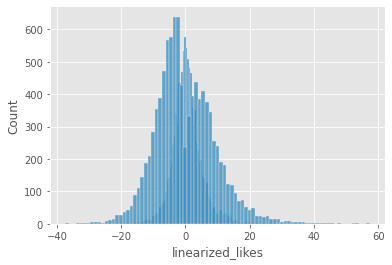

In [53]:
group1['linearized_likes'] = df_linearized.apply(
    lambda x: get_linearized_likes(x['likes'], x['views'], global_ctr_2), axis=1)

sns.histplot(group1['linearized_likes'],
             kde = False)
group2['linearized_likes'] = df_linearized.apply(
    lambda x: get_linearized_likes(x['likes'], x['views'], global_ctr_2), axis=1)

sns.histplot(group2['linearized_likes'],
             kde = False)

In [54]:
stats.ttest_ind(group1['linearized_likes'] , group2['linearized_likes'] , equal_var = False)

Ttest_indResult(statistic=5.875197054309625, pvalue=4.313818677881745e-09)

**–í—ã–≤–æ–¥**

—Å–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º—É —Ç–µ—Å—Ç—É p value < 0.05, –ø–æ—ç—Ç–æ–º—É –Ω–∞ –¥–∞–Ω–Ω–æ–º —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –º—ã –º–æ–∂–µ–º –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –∏ –ø—Ä–∏–Ω—è—Ç—å –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é

<AxesSubplot:xlabel='linearized_likes', ylabel='Count'>

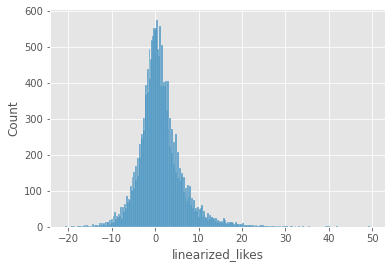

In [56]:
group0['linearized_likes'] = df_linearized.apply(
    lambda x: get_linearized_likes(x['likes'], x['views'], global_ctr_2), axis=1)
sns.histplot(group0['linearized_likes'],
             kde = False)
group3['linearized_likes'] = df_linearized.apply(
    lambda x: get_linearized_likes(x['likes'], x['views'], global_ctr_2), axis=1)
sns.histplot(group3['linearized_likes'],
             kde = False,
            palette = ['r', 'b'])

In [58]:
stats.ttest_ind(group0['linearized_likes'] , group3['linearized_likes'] , equal_var = False)

Ttest_indResult(statistic=-14.514397206083885, pvalue=1.7107859347382044e-47)

**–í—ã–≤–æ–¥**

—Å–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º—É —Ç–µ—Å—Ç—É p value < 0.05, –ø–æ—ç—Ç–æ–º—É –Ω–∞ –¥–∞–Ω–Ω–æ–º —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –º—ã –º–æ–∂–µ–º –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –∏ –ø—Ä–∏–Ω—è—Ç—å –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Å –ø–æ–º–æ—â—å—é –º–µ—Ç—Ä–∏–∫–∏ –ª–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ª–∞–π–∫–æ–≤ –º—ã –≤–∏–¥–∏–º –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –æ–±–æ–∏—Ö —Ç–µ—Å—Ç–∞—Ö, –±–æ–ª–ª–µ —Ç–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏–µ p_value –æ—á–µ–Ω—å –Ω–∏–∑–∫–æ–µ (–±–ª–∏–∑–∫–æ–µ –∫ 0)